In [1]:
#import dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
#read df
df = pd.read_csv("Resources/alcohol_sales_89_18.csv")

In [3]:
df.head()

,REF_DATE,GEO,DGUID,Type of sales,Type of beverage,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1989,Canada,NaN,Total sales,Total alcoholic beverages,Litres,203,thousands,3,v28463244,1.1.1,189402.0,NaN,NaN,NaN,0
1,1989,Canada,NaN,Total sales,Spirits,Litres,203,thousands,3,v28463245,1.1.2,56542.0,NaN,NaN,NaN,0
2,1989,Canada,NaN,Total sales,Wine,Litres,203,thousands,3,v28463246,1.1.3,26888.0,NaN,NaN,NaN,0
3,1989,Canada,NaN,Total sales,Beer,Litres,203,thousands,3,v28463247,1.1.4,105972.0,NaN,NaN,NaN,0
4,1989,Canada,NaN,Total per capita sales,Total alcoholic beverages,Litres,203,units,0,v28463248,1.2.1,8.8,NaN,NaN,NaN,1


In [4]:
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Type of sales', 'Type of beverage', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [5]:
#extract all neccesary columns 
alc_sales = df[['REF_DATE','GEO','Type of sales','Type of beverage', "VALUE"]]

In [6]:
alc_sales.head()

,REF_DATE,GEO,Type of sales,Type of beverage,VALUE
0,1989,Canada,Total sales,Total alcoholic beverages,189402.0
1,1989,Canada,Total sales,Spirits,56542.0
2,1989,Canada,Total sales,Wine,26888.0
3,1989,Canada,Total sales,Beer,105972.0
4,1989,Canada,Total per capita sales,Total alcoholic beverages,8.8


In [7]:
#rename columns 
alc_sales = alc_sales.rename(columns={"REF_DATE":'Year',"VALUE":"Total Sales"})

In [8]:
alc_sales.head()

,Year,GEO,Type of sales,Type of beverage,Total Sales
0,1989,Canada,Total sales,Total alcoholic beverages,189402.0
1,1989,Canada,Total sales,Spirits,56542.0
2,1989,Canada,Total sales,Wine,26888.0
3,1989,Canada,Total sales,Beer,105972.0
4,1989,Canada,Total per capita sales,Total alcoholic beverages,8.8


In [9]:
#create a df for total alc sales by province 
provincial_total_sales = alc_sales.loc[(alc_sales["GEO"]!="Canada")&
                                       (alc_sales["GEO"]!="Northwest Territories")&
                                       (alc_sales["GEO"]!="Nunavut")&
                                       (alc_sales["Type of sales"]=="Total sales")&
                                       (alc_sales["Type of beverage"]=="Total alcoholic beverages")]

In [10]:
provincial_total_sales =provincial_total_sales.rename(columns={"GEO":"Province"})

In [11]:
#fill any nan with 0
provincial_total_sales = provincial_total_sales.fillna(0)

In [33]:
# group by province and and year 
group_provincial_total_sales = provincial_total_sales.groupby(["Province","Year"]).sum()
clean_provincial_df = group_provincial_total_sales.reset_index()
clean_provincial_df["Total Sales"] = clean_provincial_df["Total Sales"] *100
clean_provincial_df

,Province,Year,Total Sales
0,Alberta,1989,1811600.0
1,Alberta,1990,1782600.0
2,Alberta,1991,1775300.0
3,Alberta,1992,1772000.0
4,Alberta,1993,1708000.0
...,...,...,...
295,Yukon,2009,35700.0
296,Yukon,2010,37700.0
297,Yukon,2011,38200.0
298,Yukon,2012,38900.0


In [34]:
#create a list with provinces name for charts 
provinces = ["Quebec","Alberta","Newfoundland and Labrador","Nova Scotia","British Columbia","Yukon","New Brunswick",
            "Manitoba","Northwest Territories including Nunavut","Ontario","Prince Edward Island","Saskatchewan"]

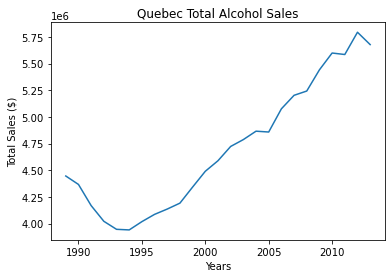

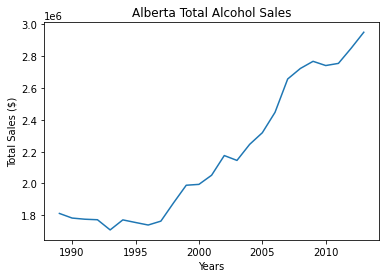

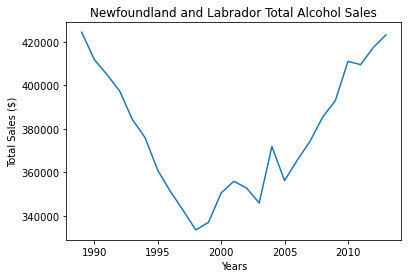

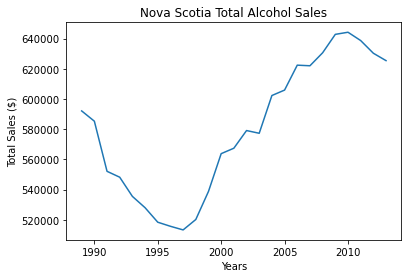

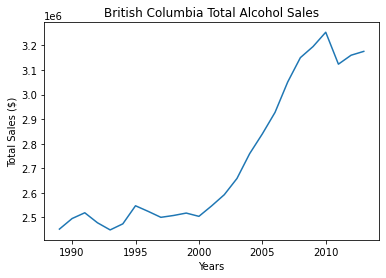

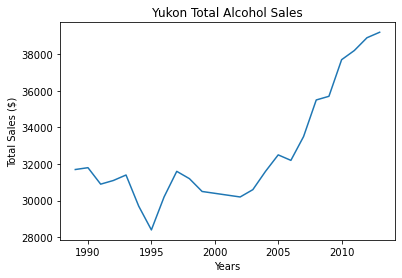

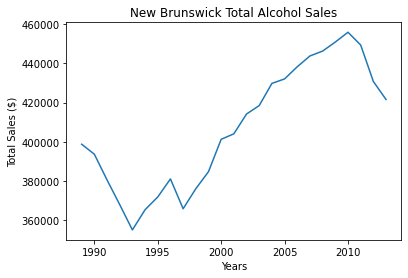

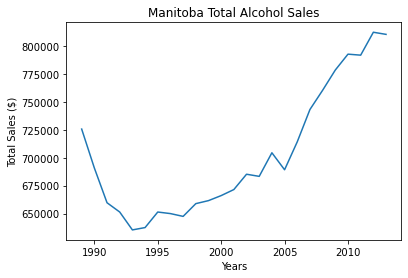

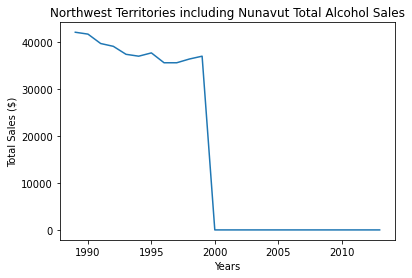

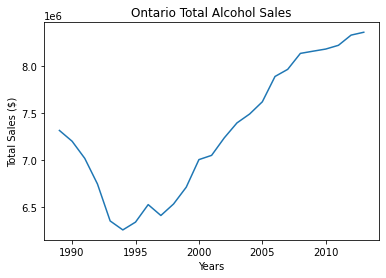

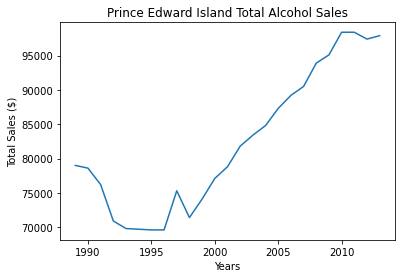

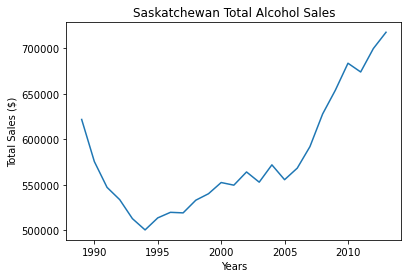

In [35]:
#create a for loop so that it will plot a line graph for each provinces alc sales 
for province in provinces:
    province_df=clean_provincial_df.loc[clean_provincial_df["Province"]==province,:]
    plt.plot(province_df["Year"],province_df["Total Sales"])
    plt.title(province + ' Total Alcohol Sales')
    plt.xlabel("Years")
    plt.ylabel("Total Sales ($)")
    plt.savefig("Output_data/" + province + "_alc_sales.png")
    plt.show()

In [15]:
#create a df for canadas total per capita sales 
can_total_capita = alc_sales.loc[(alc_sales["Type of sales"]== "Total per capita sales")&
                                 (alc_sales["Type of beverage"]=="Total alcoholic beverages")&
                                 (alc_sales["GEO"]=="Canada")
                                 ,:]

In [16]:
can_total_capita.head()

,Year,GEO,Type of sales,Type of beverage,Total Sales
4,1989,Canada,Total per capita sales,Total alcoholic beverages,8.8
108,1990,Canada,Total per capita sales,Total alcoholic beverages,8.5
212,1991,Canada,Total per capita sales,Total alcoholic beverages,8.2
316,1992,Canada,Total per capita sales,Total alcoholic beverages,7.8
420,1993,Canada,Total per capita sales,Total alcoholic beverages,7.5


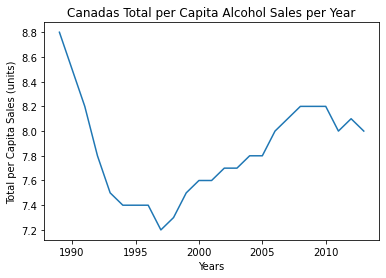

In [17]:
#create a line graph for total per capita sales per year 
plt.plot(can_total_capita["Year"],can_total_capita["Total Sales"])
plt.xlabel("Years")
plt.ylabel("Total per Capita Sales (units)")
plt.title("Canadas Total per Capita Alcohol Sales per Year")
plt.savefig("Output_data/can_capita.png")
plt.show()


In [18]:
#create a df for total per capita sales per year for provinces 
prov_total_capita = alc_sales.loc[(alc_sales["GEO"]!="Canada")&
                                       (alc_sales["GEO"]!="Northwest Territories")&
                                       (alc_sales["GEO"]!="Nunavut")&
                                       (alc_sales["Type of sales"]=="Total per capita sales")&
                                       (alc_sales["Type of beverage"]=="Total alcoholic beverages")]
prov_total_capita =prov_total_capita.rename(columns={"GEO":"Province"})
prov_total_capita = prov_total_capita.fillna(0)

In [19]:
group_provincial_capita_sales = prov_total_capita.groupby(["Province","Year"]).sum()
clean_provincial_capita_df = group_provincial_capita_sales.reset_index()

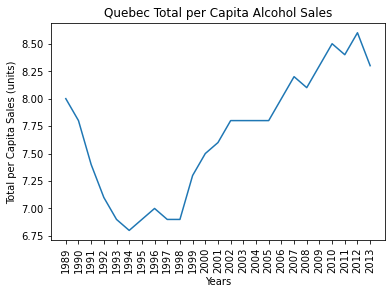

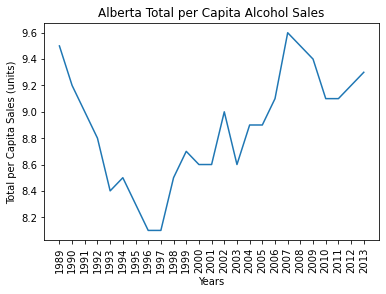

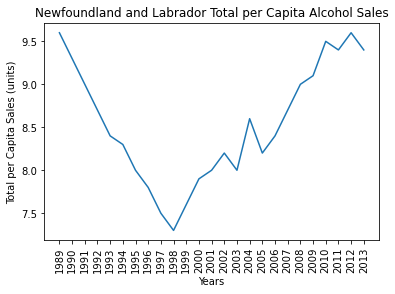

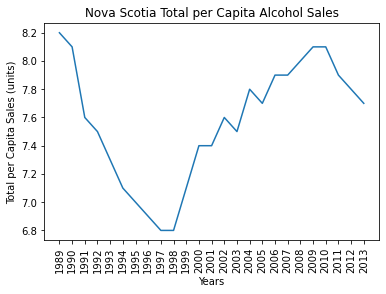

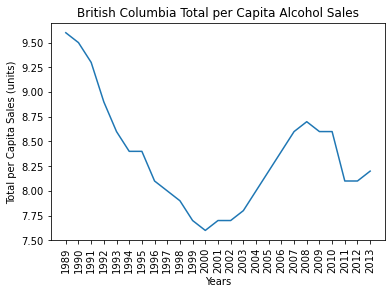

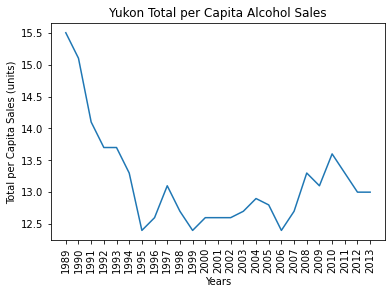

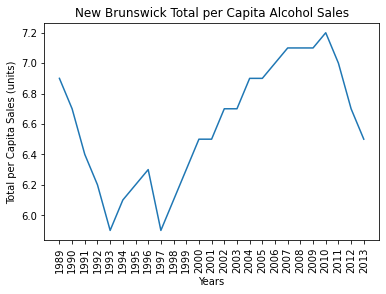

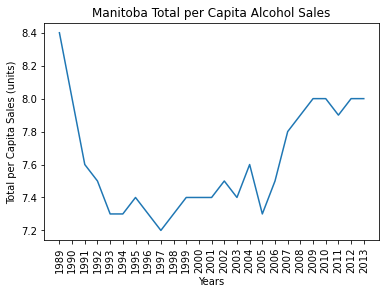

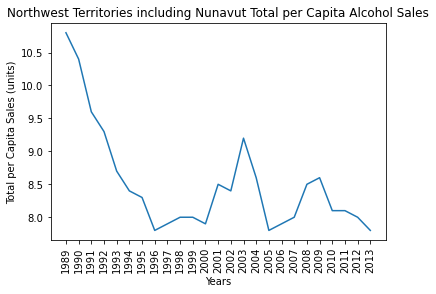

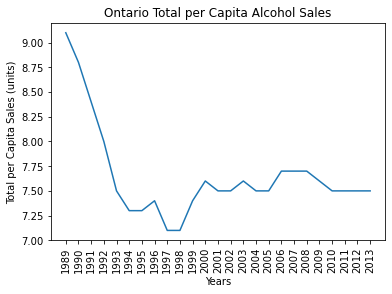

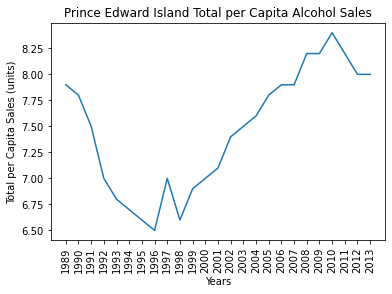

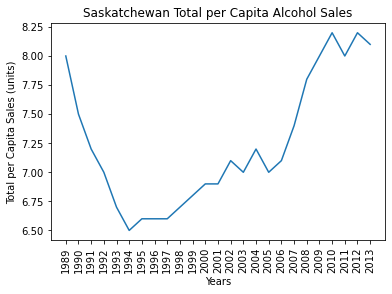

In [20]:
for province in provinces:
    capita_df=clean_provincial_capita_df.loc[clean_provincial_capita_df["Province"]==province,:]
    plt.plot(capita_df["Year"],capita_df["Total Sales"])
    plt.title(province + ' Total per Capita Alcohol Sales')
    plt.xlabel("Years")
    plt.ylabel("Total per Capita Sales (units)")
    plt.xticks(province_df["Year"],rotation="vertical")
    plt.show()

In [21]:
df2 = pd.read_csv("Resources/sales_data_value_alcohol.csv")
df2

,REF_DATE,GEO,DGUID,Value and volume,Type of beverage,Type of product,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1993,Canada,NaN,Value in dollars,Total beverages,Total products,Dollars,81,thousands,3,v20856629,1.1.1.1,10425421,NaN,NaN,NaN,0
1,1994,Canada,NaN,Value in dollars,Total beverages,Total products,Dollars,81,thousands,3,v20856629,1.1.1.1,10319303,NaN,NaN,NaN,0
2,1995,Canada,NaN,Value in dollars,Total beverages,Total products,Dollars,81,thousands,3,v20856629,1.1.1.1,10398702,NaN,NaN,NaN,0
3,1996,Canada,NaN,Value in dollars,Total beverages,Total products,Dollars,81,thousands,3,v20856629,1.1.1.1,10655115,NaN,NaN,NaN,0
4,1997,Canada,NaN,Value in dollars,Total beverages,Total products,Dollars,81,thousands,3,v20856629,1.1.1.1,10981893,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2009,Canada,NaN,Value in dollars,Unidentified wines,Import products,Dollars,81,thousands,3,v31185916,1.1.20.3,310678,NaN,NaN,NaN,0
1235,2010,Canada,NaN,Value in dollars,Unidentified wines,Import products,Dollars,81,thousands,3,v31185916,1.1.20.3,302105,NaN,NaN,NaN,0
1236,2011,Canada,NaN,Value in dollars,Unidentified wines,Import products,Dollars,81,thousands,3,v31185916,1.1.20.3,320337,NaN,NaN,NaN,0
1237,2012,Canada,NaN,Value in dollars,Unidentified wines,Import products,Dollars,81,thousands,3,v31185916,1.1.20.3,338616,NaN,NaN,NaN,0


In [22]:
#extract neccesary columns
can_sales = df2[['REF_DATE','GEO','Type of product','Type of beverage', "VALUE"]]

In [23]:
#create a df for canada alc sales per year 
can_sales = can_sales.loc[(can_sales["GEO"]=="Canada")&
                         (can_sales["Type of product"]=='Total products')&
                         (can_sales["Type of beverage"]=="Total beverages")]

In [36]:
can_sales = can_sales.rename(columns={"REF_DATE":"Year","VALUE":"Total Sales"})
can_sales['Year'] = pd.to_datetime(can_sales['Year'], format='%Y')
can_sales

,Year,GEO,Type of product,Type of beverage,Total Sales
0,1993-01-01,Canada,Total products,Total beverages,10425421
1,1994-01-01,Canada,Total products,Total beverages,10319303
2,1995-01-01,Canada,Total products,Total beverages,10398702
3,1996-01-01,Canada,Total products,Total beverages,10655115
4,1997-01-01,Canada,Total products,Total beverages,10981893
5,1998-01-01,Canada,Total products,Total beverages,11713647
6,1999-01-01,Canada,Total products,Total beverages,12375387
7,2000-01-01,Canada,Total products,Total beverages,13021576
8,2001-01-01,Canada,Total products,Total beverages,13455472
9,2002-01-01,Canada,Total products,Total beverages,14339190


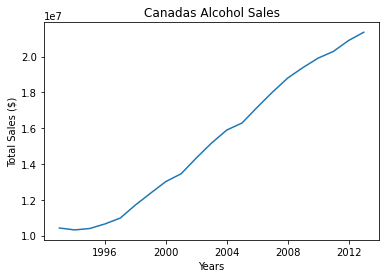

In [37]:
#create a line graph for canada alc sales per year 
plt.plot(can_sales["Year"],can_sales["Total Sales"])
plt.ylabel("Total Sales ($)")
plt.xlabel("Years")
plt.title("Canadas Alcohol Sales")
plt.savefig("Output_data/canada_sales.png")
plt.show()

In [26]:
cannibis_df = pd.read_csv("Resources/cannabis_usage_1961_2018.csv")
cannibis_df = cannibis_df.rename(columns={"REF_DATE":"Year","VALUE":"Value"})
cannibis_df.columns

Index(['Year', 'GEO', 'DGUID', 'Prevalence', 'Age group', 'Frequency of use',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'Value', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [27]:
clean_can_df = cannibis_df[["Year","Prevalence","Age group","Frequency of use","Value"]]
clean_can_df

,Year,Prevalence,Age group,Frequency of use,Value
0,1961,Consuming population of cannabis,15 years and over,"Total, all frequencies",277512.0
1,1961,Consuming population of cannabis,15 years and over,Once,17616.0
2,1961,Consuming population of cannabis,15 years and over,Less than once per month,97880.0
3,1961,Consuming population of cannabis,15 years and over,One to three times per month,51722.0
4,1961,Consuming population of cannabis,15 years and over,At least once a week (excludes daily),70428.0
...,...,...,...,...,...
4171,2018,Volume of cannabis consumed,65 years and over,Once,NaN
4172,2018,Volume of cannabis consumed,65 years and over,Less than once per month,NaN
4173,2018,Volume of cannabis consumed,65 years and over,One to three times per month,NaN
4174,2018,Volume of cannabis consumed,65 years and over,At least once a week (excludes daily),NaN


In [28]:
reduced_can_df = clean_can_df.loc[(clean_can_df["Year"]>=1993)&
                                  (clean_can_df["Year"]<=2013)&
                                 (clean_can_df["Prevalence"]=="Consuming population of cannabis")&
                                 (clean_can_df["Age group"]!="65 years and over")&
                                 (clean_can_df["Frequency of use"]=="Total, all frequencies"),: ]
reduced_can_df
total_pop_can = reduced_can_df.loc[reduced_can_df["Age group"]=="15 years and over",["Year","Value"]]
total_pop_can = total_pop_can.rename(columns={"Value":"Cannabis Consumers"}).reset_index().drop(columns="index")
total_pop_can

,Year,Cannabis Consumers
0,1993,2222323.0
1,1994,2284573.0
2,1995,2370062.0
3,1996,2473932.0
4,1997,2591369.0
5,1998,2717545.0
6,1999,2845804.0
7,2000,2967057.0
8,2001,3075339.0
9,2002,3167125.0


In [29]:
can_alc_sales = pd.merge(total_pop_can,can_sales,on="Year",how="outer")
can_alc_sales=can_alc_sales.drop(columns=["Type of beverage","Type of product"])
can_alc_sales = can_alc_sales[["Year","GEO","Cannabis Consumers","Total Sales"]]
can_alc_sales

,Year,GEO,Cannabis Consumers,Total Sales
0,1993,Canada,2222323.0,10425421
1,1994,Canada,2284573.0,10319303
2,1995,Canada,2370062.0,10398702
3,1996,Canada,2473932.0,10655115
4,1997,Canada,2591369.0,10981893
5,1998,Canada,2717545.0,11713647
6,1999,Canada,2845804.0,12375387
7,2000,Canada,2967057.0,13021576
8,2001,Canada,3075339.0,13455472
9,2002,Canada,3167125.0,14339190


In [30]:
slope,intercept,rvalue,pvalue,sems = linregress(can_alc_sales["Cannabis Consumers"],can_alc_sales["Total Sales"])
regress_values = (slope*(can_alc_sales["Cannabis Consumers"])) + intercept
eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

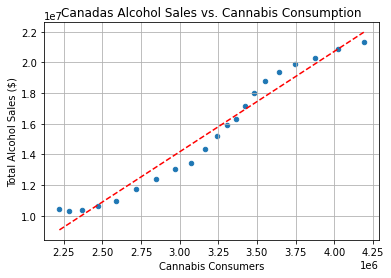

y =6.55x + -5479076.34
0.98


In [31]:
can_alc_sales.plot(kind="scatter",x="Cannabis Consumers",y="Total Sales")
plt.ylabel("Total Alcohol Sales ($)")
plt.title("Canadas Alcohol Sales vs. Cannabis Consumption")
plt.plot(can_alc_sales["Cannabis Consumers"],regress_values, "r--")
plt.grid()
plt.savefig("Output_data/alcvscannabis.png")
plt.show()
print(eq)
print(round(rvalue,2))